# Projeto pinguins

## 1. Passos iniciais

### Bibliotecas

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Abrindo o arquivo

In [258]:
df = pd.read_csv('penguins.csv')
display(df)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## 2. Análise inicial

### Removendo colunas desnecessárias

In [259]:
df = df.iloc[:,1:]
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Variáveis

O dataframe é composto pelas seguintes variáveis:

- species: espécie do pinguim, que pode ser Adelie, Gentoo ou Chinstrap
- island: ilha na qual o pinguim se encontra, podendo ser Torgersen, Biscoe ou Dream
- bill_length_mm: comprimento do bico do pinguim, em milímetros
- bill_depth_mm: altura do bico do pinguim, em milímetros
- flipper_length_mm: comprimento da nadadeira do pinguim, em milímetros
- body_mass_g: peso corporal do pinguim, em gramas
- sex: se o pinguim é macho ou fêmea
- year: ano de coleta da informação, podendo ser 2007, 2008 ou 2009

### Informações gerais do dataset

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


Com exceção das colunas species e island, todas as colunas possuem algum valor nulo.

### Selecionando linhas com valores nulos

In [261]:
valores_na = df['sex'].isna()
df_nulos = df[valores_na]
display(df_nulos)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


Podemos observar que apenas 2 pinguins possuem dados faltantes nas colunas bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g e sex (ids 3 e 271). \
Os outros possuem dados faltantes apenas na coluna sex (ids 8, 9, 10, 11, 47, 178, 218, 256 e 268).

### Tratamento de valores nulos

Para tratar os valores faltantes numéricos (bill_length_mm, bill_depth_mm, flipper_length_mm e body_mass_g) decidiu-se preenchê-los com os valores médios dos pinguins da mesma espécie. Como eram apenas 2 pinguins, não foi feita a diferenciação entre machos e fêmeas - até porque não sabemos os sexos desses dois pinguins.

In [262]:
# Substituindo os valores nulos pelos valores médios dos pinguins da mesma espécie
df = df.fillna(df.loc[df['species']=='Adelie',:].mean()).round(2)
df = df.fillna(df.loc[df['species']=='Gentoo',:].mean()).round(2)
display(df)

C:\Users\User\AppData\Local\Temp\ipykernel_9612\1828130841.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.loc[df['species']=='Adelie',:].mean()).round(2)
C:\Users\User\AppData\Local\Temp\ipykernel_9612\1828130841.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.loc[df['species']=='Gentoo',:].mean()).round(2)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male,2007
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female,2007
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female,2007
3,Adelie,Torgersen,38.79,18.35,189.95,3700.66,NaN,2007
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.80,19.80,207.00,4000.00,male,2009
340,Chinstrap,Dream,43.50,18.10,202.00,3400.00,female,2009
341,Chinstrap,Dream,49.60,18.20,193.00,3775.00,male,2009
342,Chinstrap,Dream,50.80,19.00,210.00,4100.00,male,2009


Para a variável categórica sex, optou-se por aplicar um modelo de árvore de decisão para prever o sexo dos pinguins a partir das outras variáveis.

In [263]:
# Selecionando o dataframe sem valores nulos
df_sem_nulos = df.dropna()
# Definindo o dataframe a ser utilizado na árvore de decisão
df_classificador = df_sem_nulos.iloc[:,:-2]
# Substituindo as variáveis categóricas por variáveis numéricas correspondentes
df_classificador = df_classificador.replace('Adelie',1).replace('Gentoo',2).replace('Chinstrap',3)
df_classificador = df_classificador.replace('Torgersen',1).replace('Biscoe',2).replace('Dream',3)
display(df_classificador)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1,1,39.1,18.7,181.0,3750.0
1,1,1,39.5,17.4,186.0,3800.0
2,1,1,40.3,18.0,195.0,3250.0
4,1,1,36.7,19.3,193.0,3450.0
5,1,1,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
339,3,3,55.8,19.8,207.0,4000.0
340,3,3,43.5,18.1,202.0,3400.0
341,3,3,49.6,18.2,193.0,3775.0
342,3,3,50.8,19.0,210.0,4100.0


In [264]:
# Dividindo o dataframe em treino e teste
x_train, x_test, y_train, y_test = train_test_split(df_classificador, df_sem_nulos['sex'], test_size = 0.2)

In [265]:
# Criando o modelo
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc = clf.score(x_test, y_test)
# Printando a acurácia do modelo
print("Acurácia: ", acc.round(2))

Acurácia:  0.85


In [266]:
# Selecionando o dataframe com os valores nulos a serem previstos
valores_na = df['sex'].isna()
df_nulos = df[valores_na]
# Substituindo as variáveis categóricas por variáveis numéricas correspondentes
df_classificador_nulos = df_nulos.replace('Adelie',1).replace('Gentoo',2).replace('Chinstrap',3)
df_classificador_nulos = df_classificador_nulos.replace('Torgersen',1).replace('Biscoe',2).replace('Dream',3)
display(df_classificador_nulos)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,1,1,38.79,18.35,189.95,3700.66,NaN,2007
8,1,1,34.10,18.10,193.00,3475.00,NaN,2007
9,1,1,42.00,20.20,190.00,4250.00,NaN,2007
10,1,1,37.80,17.10,186.00,3300.00,NaN,2007
11,1,1,37.80,17.30,180.00,3700.00,NaN,2007
47,1,3,37.50,18.90,179.00,2975.00,NaN,2007
178,2,2,44.50,14.30,216.00,4100.00,NaN,2007
218,2,2,46.20,14.40,214.00,4650.00,NaN,2008
256,2,2,47.30,13.80,216.00,4725.00,NaN,2009
268,2,2,44.50,15.70,217.00,4875.00,NaN,2009


In [267]:
# Prevendo a variável sex de acordo com o modelo
sex_predict = list(clf.predict(df_classificador_nulos.iloc[:,:-2]))
sex_predict

['male',
 'female',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male']

In [268]:
# Substituindo os valores no dataframe original
contador = 0
for i, valor in enumerate(df['sex']):
    if pd.isna(valor):
        df.loc[i, 'sex'] = sex_predict[contador]
        contador += 1
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male,2007
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female,2007
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female,2007
3,Adelie,Torgersen,38.79,18.35,189.95,3700.66,male,2007
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.80,19.80,207.00,4000.00,male,2009
340,Chinstrap,Dream,43.50,18.10,202.00,3400.00,female,2009
341,Chinstrap,Dream,49.60,18.20,193.00,3775.00,male,2009
342,Chinstrap,Dream,50.80,19.00,210.00,4100.00,male,2009


### Confirmando se todos os valores nulos foram preenchidos

In [269]:
np.sum(df.isnull())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

## 3. Análise exploratória

### Divisão do dataset por espécies

In [270]:
df_adelie = df.loc[df['species']=='Adelie',:]
df_gentoo = df.loc[df['species']=='Gentoo',:]
df_chinstrap = df.loc[df['species']=='Chinstrap',:]

### Medidas descritivas das variáveis numéricas

In [271]:
df.iloc[:,:-1].describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,344.0,43.892093,5.457648,32.1,39.2,44.25,48.5,59.6
bill_depth_mm,344.0,17.158140,1.971142,13.1,15.6,17.30,18.7,21.5
flipper_length_mm,344.0,200.851453,14.045492,172.0,190.0,197.00,213.0,231.0
body_mass_g,344.0,4198.841047,800.522732,2700.0,3550.0,4025.00,4750.0,6300.0


### Análises de proporção

C:\Users\User\AppData\Local\Temp\ipykernel_9612\4236127528.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot2grid((1, 3),(0,0))


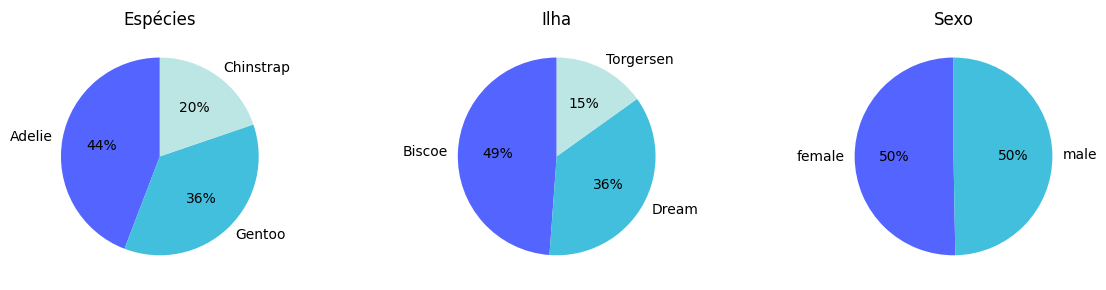

In [272]:
# espécies, ilhas e sexo
custom_pallete = sns.color_palette(['#5465FF', '#42BFDD', '#BBE6E4'])
fig, ax = plt.subplots(figsize=(12, 3))
ax0 = plt.subplot2grid((1, 3),(0,0))
count = df['species'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette(custom_pallete));
plt.title('Espécies')

ax2 = plt.subplot2grid((1, 3), (0, 1))
count = df['island'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette(custom_pallete));
plt.title('Ilha')

ax1 = plt.subplot2grid((1, 3), (0, 2))
count = df['sex'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette(custom_pallete));
plt.title('Sexo')

plt.tight_layout()

Algumas considerações e questionamentos que podemos realizar pela análise dos gráficos:
- A maior parte dos pinguins é da espécie Adelie (44%)
- A maior parte dos pinguins se encontra na ilha Biscoe (49%)
- Os pinguins estão igualmente divididos entre machos e fêmeas
- As proporções de espécies são semelhantes às proporções de quantidade de pinguins nas ilhas
- Qual será a proporção de espécies em cada ilha?
- Qual será a proporção de machos e fêmeas por espécie? E por ilha?
- Quais as proporções por ano?

C:\Users\User\AppData\Local\Temp\ipykernel_9612\2032784871.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax30 = plt.subplot2grid((1, 3),(0,0))


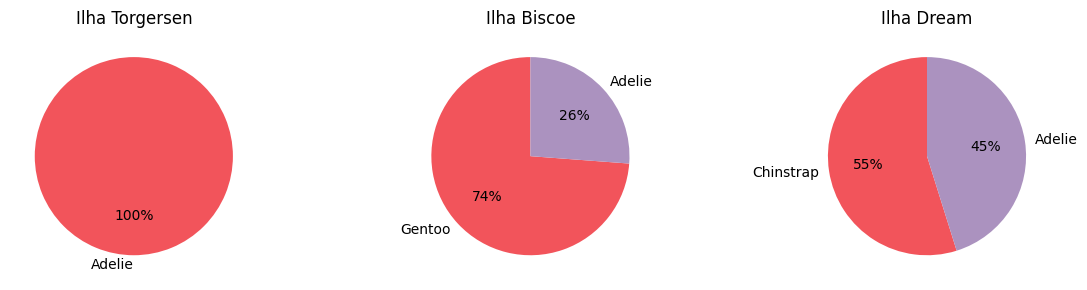

In [273]:
# espécies por ilha
custom_pallete2 = sns.color_palette(['#F2545B', '#AB92BF'])
figs3, axs3 = plt.subplots(figsize=(12, 3))
ax30 = plt.subplot2grid((1, 3),(0,0))
count = df['species'].loc[df['island']=='Torgersen'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette(custom_pallete2));
plt.title('Ilha Torgersen')

ax31 = plt.subplot2grid((1, 3), (0, 1))
count = df['species'].loc[df['island']=='Biscoe'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette(custom_pallete2));
plt.title('Ilha Biscoe')

ax32 = plt.subplot2grid((1, 3), (0, 2))
count = df['species'].loc[df['island']=='Dream'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette(custom_pallete2));
plt.title('Ilha Dream')

plt.tight_layout()

- A ilha Torgersen é habitada apenas pelos pinguins Adelie
- Os pinguins Adelie habitam as três ilhas
- Os pinguins Gentoo habitam apenas a ilha Biscoe e compõem 74% dos pinguins da ilha
- Os pinguins Chinstrap habitam apenas a ilha Dream e compõem 55% dos pinguins da ilha

C:\Users\User\AppData\Local\Temp\ipykernel_9612\1971637277.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax50 = plt.subplot2grid((1, 3),(0,0))


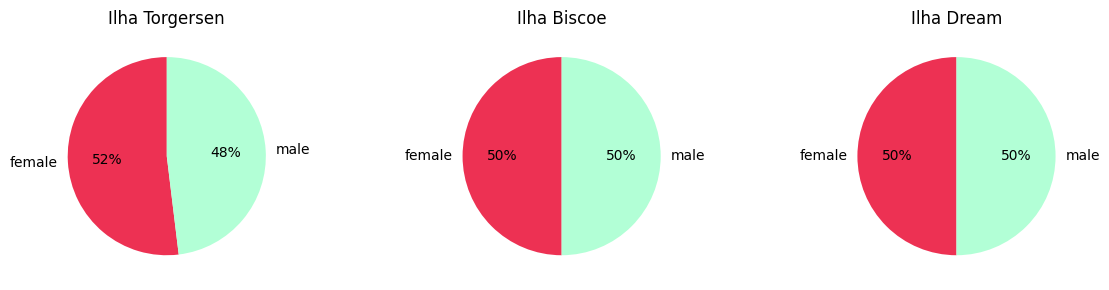

In [274]:
# sexo por ilha
custom_pallete3 = sns.color_palette(['#ED3153', '#B2FFD6'])
figs5, axs5 = plt.subplots(figsize=(12, 3))
ax50 = plt.subplot2grid((1, 3),(0,0))
count = df['sex'].loc[df['island']=='Torgersen'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette(custom_pallete3));
plt.title('Ilha Torgersen')

ax51 = plt.subplot2grid((1, 3), (0, 1))
count = df['sex'].loc[df['island']=='Biscoe'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette(custom_pallete3));
plt.title('Ilha Biscoe')

ax52 = plt.subplot2grid((1, 3), (0, 2))
count = df['sex'].loc[df['island']=='Dream'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette(custom_pallete3));
plt.title('Ilha Dream')

plt.tight_layout()

- A ilha Torgersen, que é habitada apenas pelos pinguins Adelie, possui maior parte de pinguins fêmeas (54%)
- As ilhas Biscoe e Dream, apesar de serem habitadas por duas espécies diferentes de pinguins, possuem proporção (praticamente) igual de machos e fêmeas

C:\Users\User\AppData\Local\Temp\ipykernel_9612\256234616.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax40 = plt.subplot2grid((1, 3),(0,0))


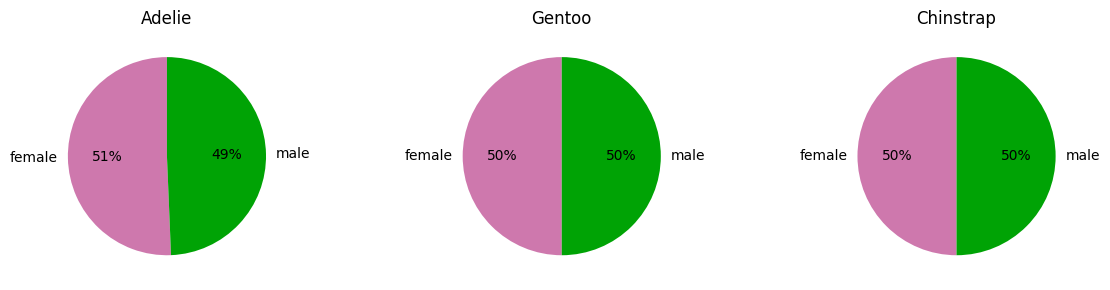

In [275]:
# sexo por espécie
custom_pallete4 = sns.color_palette(['#CE78AD', '#00A305'])
figs4, axs4 = plt.subplots(figsize=(12, 3))
ax40 = plt.subplot2grid((1, 3),(0,0))
count = df['sex'].loc[df['species']=='Adelie'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette(custom_pallete4));
plt.title('Adelie')

ax41 = plt.subplot2grid((1, 3), (0, 1))
count = df['sex'].loc[df['species']=='Gentoo'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette(custom_pallete4));
plt.title('Gentoo')

ax42 = plt.subplot2grid((1, 3), (0, 2))
count = df['sex'].loc[df['species']=='Chinstrap'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette(custom_pallete4));
plt.title('Chinstrap')

plt.tight_layout()

- Todas as espécies apresentam praticamente a mesma quantidade de machos e fêmeas

### Análises por ano

In [276]:
# espécies por ilha em cada ano
df_agrupado1 = df.groupby(['island', 'year', 'species']).count()[['sex']]
df_agrupado1 = df_agrupado1.rename(columns={'sex': 'número de pinguins'})
display(df_agrupado1)

número de pinguins
island    year species                      
Biscoe    2007 Adelie                     10
               Gentoo                     34
          2008 Adelie                     18
               Gentoo                     46
          2009 Adelie                     16
               Gentoo                     44
Dream     2007 Adelie                     20
               Chinstrap                  26
          2008 Adelie                     16
               Chinstrap                  18
          2009 Adelie                     20
               Chinstrap                  24
Torgersen 2007 Adelie                     20
          2008 Adelie                     16
          2009 Adelie                     16

Ilha Biscoe:
- De 2007 para 2008 houve um aumento no número de registros de pinguins das duas espécies
- De 2008 para 2009 os registros diminuíram, mas ainda se mantiveram acima dos números de 2007

Ilha Dream:
- Ao contrário da ilha Biscoe, os números das duas espécies diminuíram de 2007 para 2008
- De 2008 para 2009 houve um aumento, com os valores retornando próximos aos de 2007

Ilha Torgersen:
- De 2007 para 2008 o número de registros de pinguins Adelie diminuiu
- Esse número se manteve o mesmo nos anos de 2008 e 2009

### Análise das variáveis para cada espécie

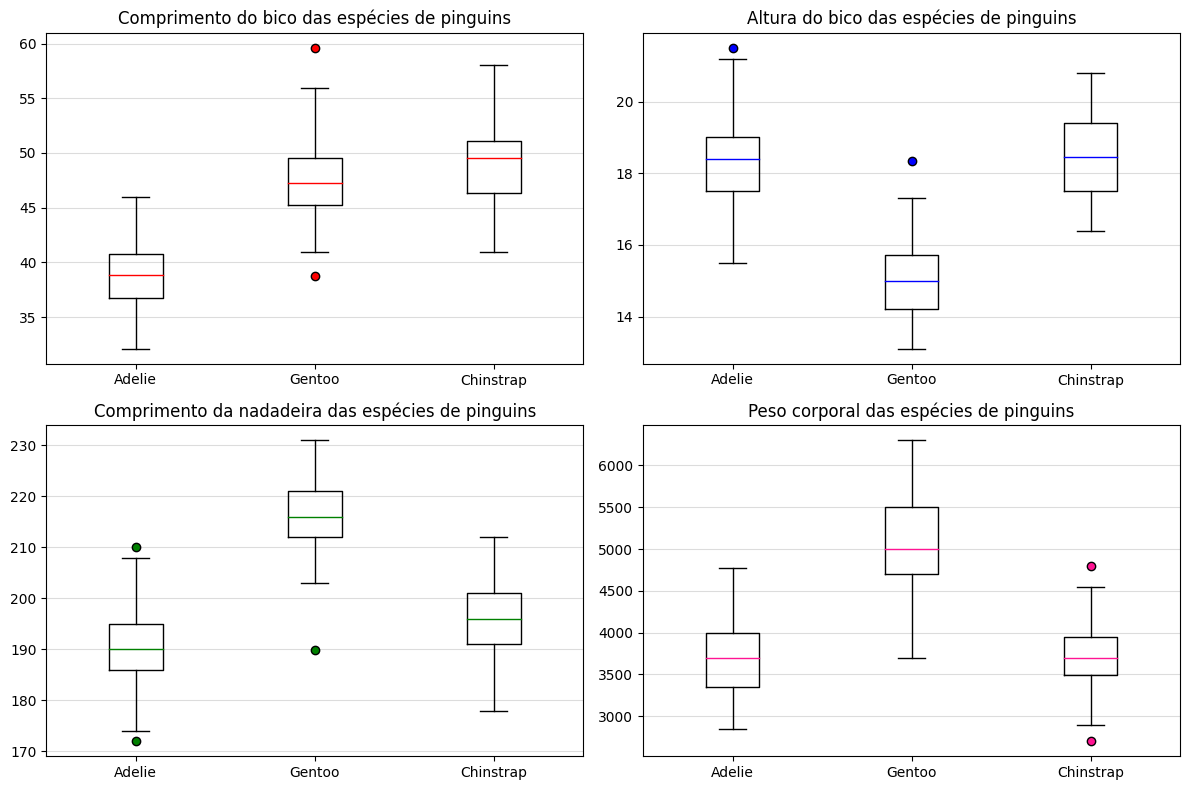

In [277]:
# Boxplot de bill_length_mm
bill_lenght = [
    df.loc[df['species']=='Adelie','bill_length_mm'], 
    df.loc[df['species']=='Gentoo','bill_length_mm'], 
    df.loc[df['species']=='Chinstrap','bill_length_mm']
]
figs, axs = plt.subplots(2, 2, figsize=(12,8))
axs[0,0].set_title('Comprimento do bico das espécies de pinguins')
axs[0,0].boxplot(bill_lenght, medianprops=dict(color='red'), flierprops=dict(markerfacecolor = 'red'))
axs[0,0].set_xticks([1,2,3], labels=['Adelie', 'Gentoo', 'Chinstrap'])
axs[0,0].yaxis.grid(True, color='gainsboro')

# Boxplot de bill_depth_mm
bill_depth_mm = [
    df.loc[df['species']=='Adelie','bill_depth_mm'], 
    df.loc[df['species']=='Gentoo','bill_depth_mm'], 
    df.loc[df['species']=='Chinstrap','bill_depth_mm']
]
axs[0,1].set_title('Altura do bico das espécies de pinguins')
axs[0,1].boxplot(bill_depth_mm, medianprops=dict(color='blue'), flierprops=dict(markerfacecolor = 'blue'))
axs[0,1].set_xticks([1,2,3], labels=['Adelie', 'Gentoo', 'Chinstrap'])
axs[0,1].yaxis.grid(True, color='gainsboro')

# Boxplot de flipper_length_mm
flipper_length_mm = [
    df.loc[df['species']=='Adelie','flipper_length_mm'], 
    df.loc[df['species']=='Gentoo','flipper_length_mm'], 
    df.loc[df['species']=='Chinstrap','flipper_length_mm']
]
axs[1,0].set_title('Comprimento da nadadeira das espécies de pinguins')
axs[1,0].boxplot(flipper_length_mm, medianprops=dict(color='green'), flierprops=dict(markerfacecolor = 'green'))
axs[1,0].set_xticks([1,2,3], labels=['Adelie', 'Gentoo', 'Chinstrap'])
axs[1,0].yaxis.grid(True, color='gainsboro')

# Boxplot de body_mass_g
body_mass_g = [
    df.loc[df['species']=='Adelie','body_mass_g'], 
    df.loc[df['species']=='Gentoo','body_mass_g'], 
    df.loc[df['species']=='Chinstrap','body_mass_g']
]
axs[1,1].set_title('Peso corporal das espécies de pinguins')
axs[1,1].boxplot(body_mass_g, medianprops=dict(color='deeppink'), flierprops=dict(markerfacecolor = 'deeppink'))
axs[1,1].set_xticks([1,2,3], labels=['Adelie', 'Gentoo', 'Chinstrap'])
axs[1,1].yaxis.grid(True, color='gainsboro')
plt.tight_layout()
plt.show()

- A espécie Gentoo aparentemente é maior que as outras duas, com pinguins mais pesados e de nadadeiras maiores, com bicos compridos porém finos
- As espécies Adelie e Chinstrap possuem peso corporal e altura do bico semelhantes, mas os Chinstrap possuem comprimentos de bico e nadadeira mais compridos

### Correlação entre as variáveis

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


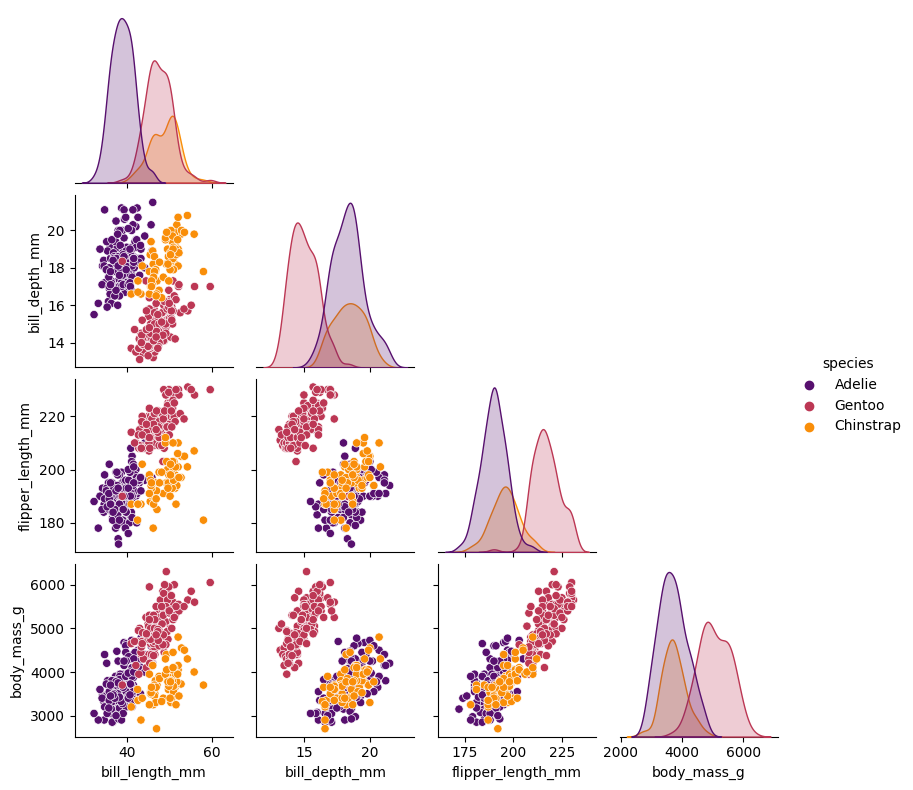

In [278]:
# Criando pairplot das variáveis
sns.pairplot(
    df.iloc[:,:-1], 
    hue='species',
    size=2,
    corner=True,
    palette = 'inferno'
)

- Grande parte das variáveis apresenta uma distribuição que se assemelha à distribuição normal, porém mais estreita
- Aparentemente, considerando todas as espécies de pinguins, as variáveis de peso corporal e comprimento de nadadeira são as que possuem correlação mais alta

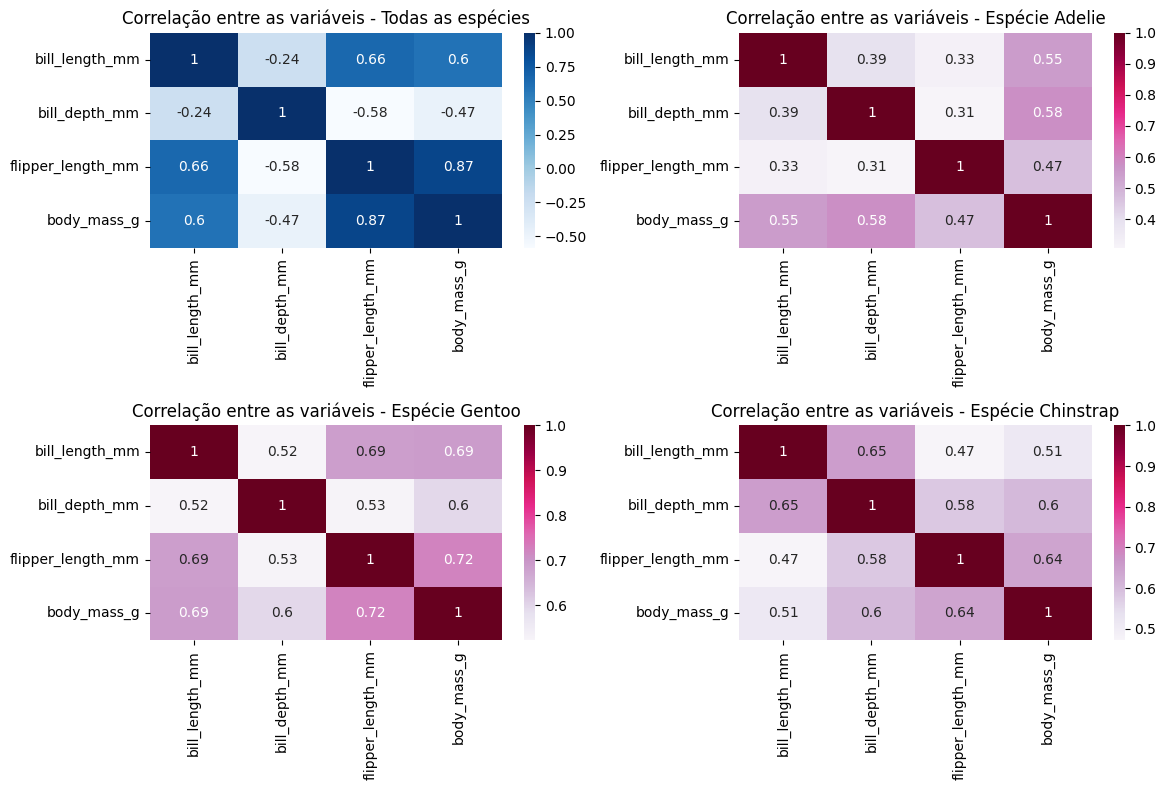

In [279]:
# Heatmap das variáveis para todas as espécies
figs2, axs2 = plt.subplots(2, 2, figsize=(12,8))
sns.heatmap(df.iloc[:,2:6].corr(), annot=True, ax=axs2[0,0], cmap='Blues')
axs2[0,0].set_title('Correlação entre as variáveis - Todas as espécies')
sns.heatmap(df_adelie.iloc[:,2:6].corr(), annot=True, ax=axs2[0,1], cmap='PuRd')
axs2[0,1].set_title('Correlação entre as variáveis - Espécie Adelie')
sns.heatmap(df_gentoo.iloc[:,2:6].corr(), annot=True, ax=axs2[1,0], cmap='PuRd')
axs2[1,0].set_title('Correlação entre as variáveis - Espécie Gentoo')
sns.heatmap(df_chinstrap.iloc[:,2:6].corr(), annot=True, ax=axs2[1,1], cmap='PuRd')
axs2[1,1].set_title('Correlação entre as variáveis - Espécie Chinstrap')
plt.tight_layout()
plt.show()

- Todas as matrizes de correlação são diferentes, indicando que cada espécie de pinguim possui suas particularidades com relação às características analisadas
- Considerando cada uma das espécies separadamente, a maior correlação ocorre entre o peso corporal e o comprimento da nadadeira na espécie Gentoo (0.72)
- A maior correlação de todas ocorre entre o peso corporal e o comprimento da nadadeira quando consideramos todas as espécies (0.87)

## 4. Redes Neurais

### Importando bibliotecas necessárias

In [280]:
import torch
import torch.nn as nn 
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

### Arrumando dataset

In [281]:
# Utilizando apenas os dados numéricos
df_redes = df.drop(columns=['island', 'sex', 'year'])
df_redes.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.10,18.70,181.00,3750.00
1,Adelie,39.50,17.40,186.00,3800.00
2,Adelie,40.30,18.00,195.00,3250.00
3,Adelie,38.79,18.35,189.95,3700.66
4,Adelie,36.70,19.30,193.00,3450.00


In [282]:
# Normalizando os dados
scaler = MinMaxScaler()
cols_norm = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_redes[cols_norm] = scaler.fit_transform(df[cols_norm])
df_redes

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,0.254545,0.666667,0.152542,0.291667
1,Adelie,0.269091,0.511905,0.237288,0.305556
2,Adelie,0.298182,0.583333,0.389831,0.152778
3,Adelie,0.243273,0.625000,0.304237,0.277961
4,Adelie,0.167273,0.738095,0.355932,0.208333
...,...,...,...,...,...
339,Chinstrap,0.861818,0.797619,0.593220,0.361111
340,Chinstrap,0.414545,0.595238,0.508475,0.194444
341,Chinstrap,0.636364,0.607143,0.355932,0.298611
342,Chinstrap,0.680000,0.702381,0.644068,0.388889


In [283]:
df_redes = df_redes.replace('Adelie',0).replace('Gentoo',1).replace('Chinstrap',2)
df_redes

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,0.254545,0.666667,0.152542,0.291667
1,0,0.269091,0.511905,0.237288,0.305556
2,0,0.298182,0.583333,0.389831,0.152778
3,0,0.243273,0.625000,0.304237,0.277961
4,0,0.167273,0.738095,0.355932,0.208333
...,...,...,...,...,...
339,2,0.861818,0.797619,0.593220,0.361111
340,2,0.414545,0.595238,0.508475,0.194444
341,2,0.636364,0.607143,0.355932,0.298611
342,2,0.680000,0.702381,0.644068,0.388889


### Modelo

In [284]:
# Definindo a arquitetura da rede neural
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(4, 10)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(10, 3)
        #self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        #x = self.softmax(x)
        return x

In [285]:
# Criando a rede neural
net = Net()

# Otimização
criterio = nn.CrossEntropyLoss()
otimizador = optim.Adam(net.parameters(), lr=0.1)

In [286]:
# Dividindo o dataset
inputs = df_redes.iloc[:,1:]
outputs = df_redes.iloc[:,:1]

In [287]:
# Treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(inputs, outputs, test_size=0.3)

x_treino = torch.Tensor(x_treino.values)
x_teste = torch.Tensor(x_teste.values)
y_treino = torch.Tensor(y_treino.values).long()
y_teste = torch.Tensor(y_teste.values).long()

In [288]:
# Treinando a rede
lista = []
for epoca in range(100):
    otimizador.zero_grad()
    out_net = net(x_treino)
    perda = criterio(out_net, y_treino.squeeze())
    perda.backward()
    otimizador.step()
        
    with torch.no_grad():
        out_net_test = net(x_teste)
        acuracia = torch.sum(torch.argmax(out_net_test, dim=1) == y_teste.squeeze()) / y_teste.shape[0]
        
    print(f'Epoca {epoca}, Perda {perda.item()}, Acurácia {acuracia:.4f}')

    lista.append([epoca, perda.item(), acuracia.item()])

Epoca 0, Perda 1.1522165536880493, Acurácia 0.2981
Epoca 1, Perda 1.0364444255828857, Acurácia 0.4712
Epoca 2, Perda 1.0048173666000366, Acurácia 0.7308
Epoca 3, Perda 0.9164202809333801, Acurácia 0.7212
Epoca 4, Perda 0.808154284954071, Acurácia 0.7212
Epoca 5, Perda 0.6997681260108948, Acurácia 0.7308
Epoca 6, Perda 0.5922935009002686, Acurácia 0.7308
Epoca 7, Perda 0.500048041343689, Acurácia 0.7308
Epoca 8, Perda 0.4270227253437042, Acurácia 0.7308
Epoca 9, Perda 0.3688425123691559, Acurácia 0.7500
Epoca 10, Perda 0.32365718483924866, Acurácia 0.7788
Epoca 11, Perda 0.28659334778785706, Acurácia 0.7788
Epoca 12, Perda 0.2539396584033966, Acurácia 0.7885
Epoca 13, Perda 0.225308358669281, Acurácia 0.8173
Epoca 14, Perda 0.20184113085269928, Acurácia 0.8269
Epoca 15, Perda 0.18335799872875214, Acurácia 0.8365
Epoca 16, Perda 0.16832715272903442, Acurácia 0.8462
Epoca 17, Perda 0.1552855372428894, Acurácia 0.8750
Epoca 18, Perda 0.14381012320518494, Acurácia 0.8750
Epoca 19, Perda 0.1

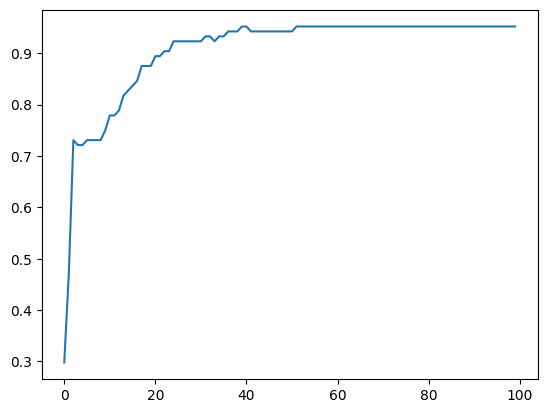

In [289]:
# Plotando gráfico de acurácia
x_vals = [t[0] for t in lista]
y_vals = [t[2] for t in lista]

plt.plot(x_vals, y_vals)